# 过拟合实战

### 1. 构建数据集

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential

In [2]:
X, y = datasets.make_moons(n_samples=500, noise=0.25, random_state=100)

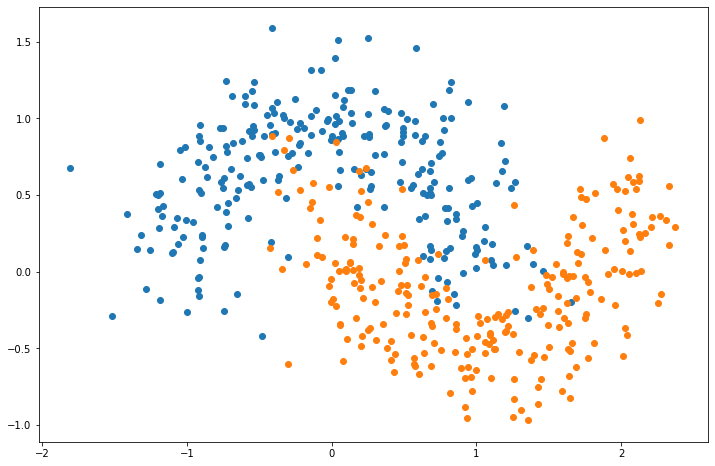

In [3]:
plt.figure(figsize=(12, 8))
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)
X_train.shape

(375, 2)

In [5]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(1, -1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predic = model.predict_classes(X_new)
    zz = y_predic.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF590', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
    
def make_plot(X, y, model, axis, title):
    plt.figure(figsize=(8, 5))
    plt.title(title)
    plot_decision_boundary(model, axis)
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])

### 2. 网络层数的影响

In [6]:
def test_layers(n):
    model = Sequential()
    model.add(layers.Dense(32, activation='relu')) # 创建第一层
    for _ in range(n):
        model.add(layers.Dense(32, activation='relu')) 
    model.add(layers.Dense(1, activation='sigmoid')) # 创建最末层
    # 模型装配与训练
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=50, verbose=0) # verbose=0 表示不输出训练信息
    
    title = "Layer is ({})".format(n)
    make_plot(X, y, model, [-2, 2.5, -1, 2], title)

c:\users\13773\tfdev\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


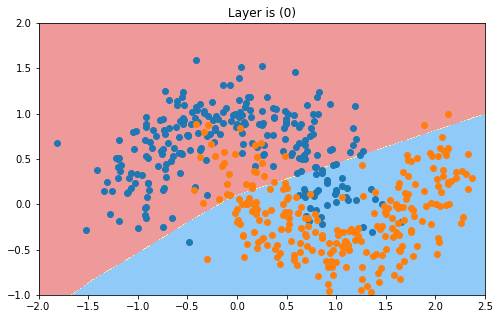

In [7]:
test_layers(0)

c:\users\13773\tfdev\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


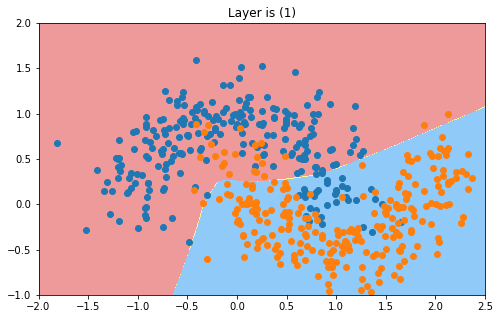

In [8]:
test_layers(1)

c:\users\13773\tfdev\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


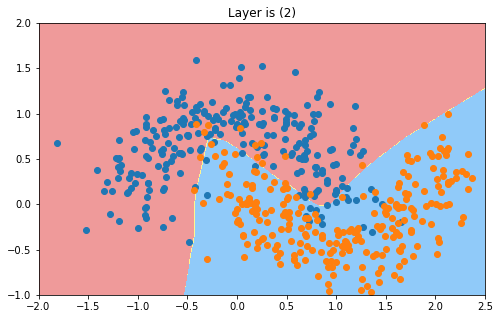

In [9]:
test_layers(2)

c:\users\13773\tfdev\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


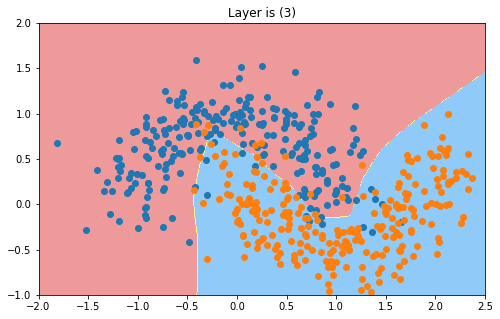

In [10]:
test_layers(3)

### 3. Dropout 的影响

In [11]:
def test_dropout(n):
    model = Sequential()
    model.add(layers.Dense(32, input_dim=2, activation='relu')) # 创建第一层
    counter = 0
    for _ in range(n):
        model.add(layers.Dense(64, activation='relu')) 
        if counter < n: # 添加 n 个 Dropout 层
            counter += 1
            model.add(layers.Dropout(rate=0.5))
    model.add(layers.Dense(1, activation='sigmoid')) # 创建最末层
    # 模型装配与训练
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=50, verbose=0) # verbose=0 表示不输出训练信息
    
    title = "Dropout ({})".format(n)
    make_plot(X, y, model, [-2, 2.5, -1, 2], title)    

c:\users\13773\tfdev\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


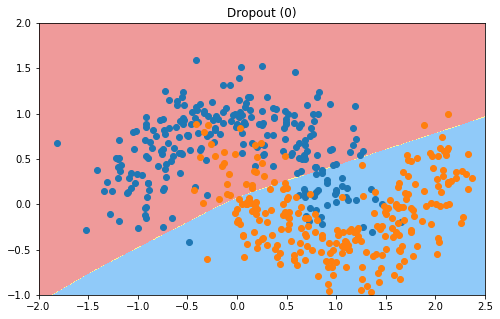

In [12]:
test_dropout(0)

c:\users\13773\tfdev\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


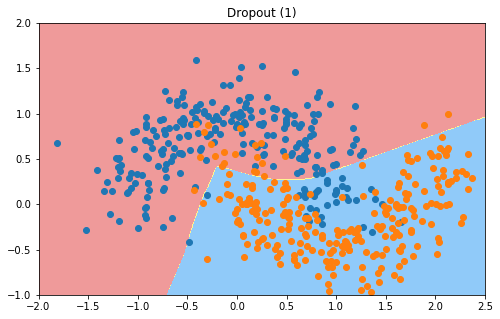

In [13]:
test_dropout(1)

c:\users\13773\tfdev\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


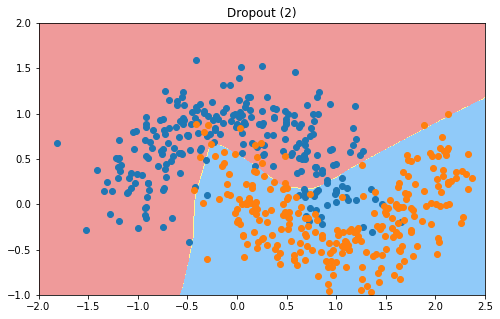

In [14]:
test_dropout(2)

c:\users\13773\tfdev\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


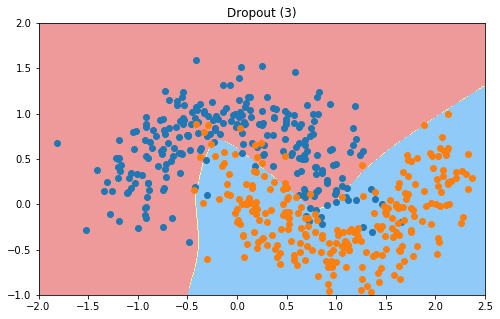

In [15]:
test_dropout(3)